<a href="https://colab.research.google.com/github/pkar443/Face-EYE-detection-using-Haar-cascade/blob/main/Face%20and%20Eye%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


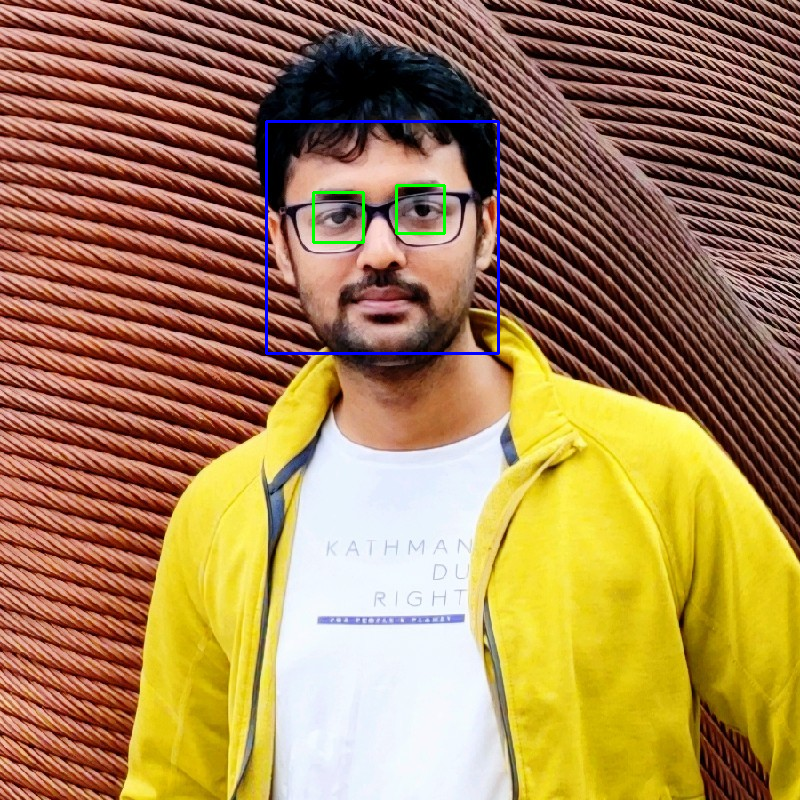

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import urllib.request

# Download the Haar cascade XML files
face_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
eye_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml"

# Function to download file from URL
def download_file(url, filename):
    urllib.request.urlretrieve(url, filename)

# Download the face and eye cascade XML files
download_file(face_url, "haarcascade_frontalface_default.xml")
download_file(eye_url, "haarcascade_eye.xml")

# Load the cascade classifiers
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Read the image
image_path = '/content/drive/MyDrive/prakash1.jpg'
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw rectangles around detected faces and eyes
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# Display the image with detections
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# **Face detection on Live camera**

<IPython.core.display.Javascript object>

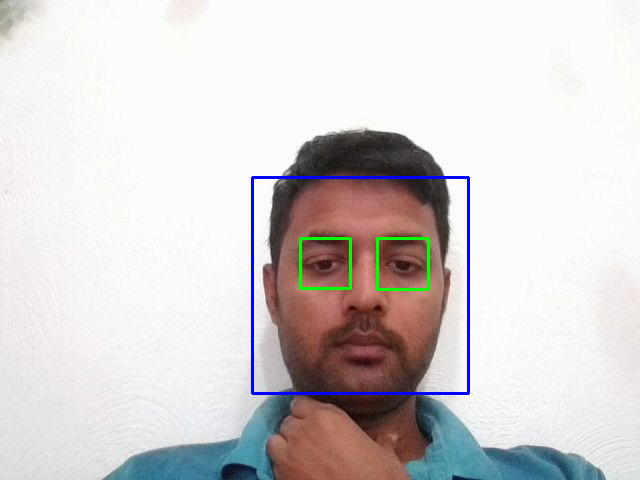

<IPython.core.display.Javascript object>

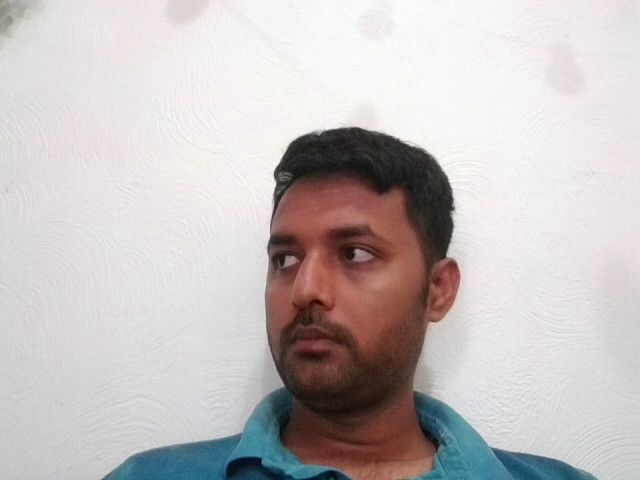

<IPython.core.display.Javascript object>

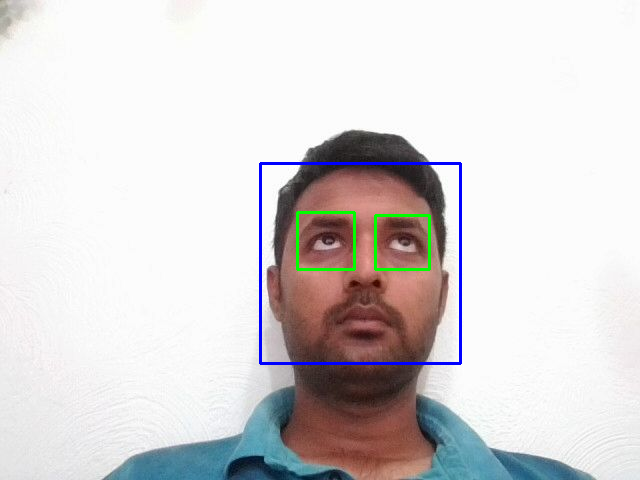

<IPython.core.display.Javascript object>

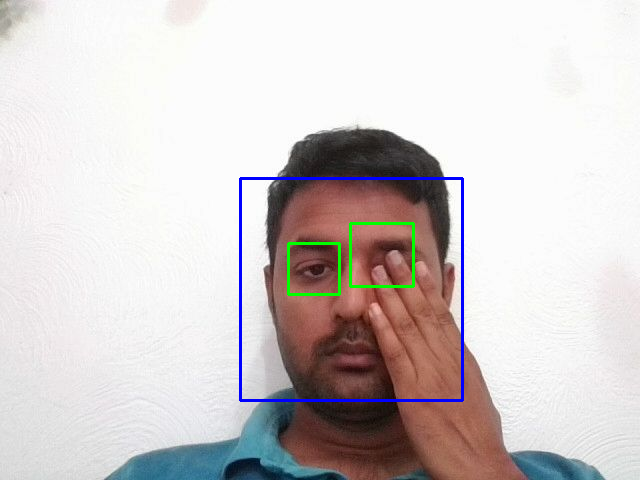

<IPython.core.display.Javascript object>

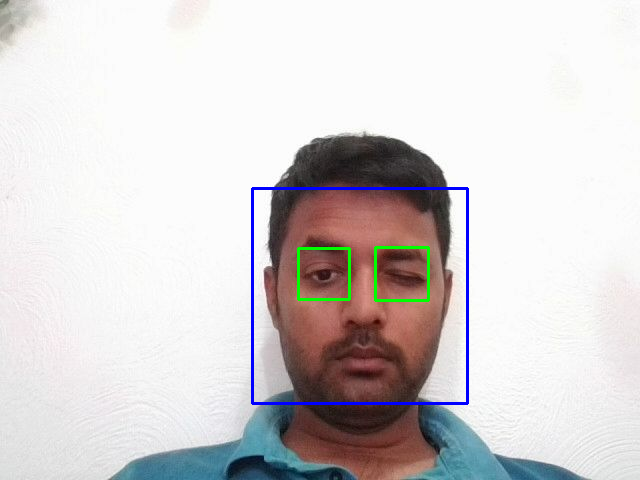

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Download the Haar cascade XML files
face_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
eye_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml"

# Function to download file from URL
def download_file(url, filename):
    urllib.request.urlretrieve(url, filename)

# Download the face and eye cascade XML files
download_file(face_url, "haarcascade_frontalface_default.xml")
download_file(eye_url, "haarcascade_eye.xml")

# Load the cascade classifiers
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Function to capture the webcam frame
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)

    # Get the image data from JavaScript
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the base64 image data and save it
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture the webcam frame and process it
while True:
    try:
        # Capture frame
        image_path = take_photo()

        # Read the captured image
        frame = cv2.imread(image_path)

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # Draw rectangles around detected faces and eyes
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        # Display the processed frame
        cv2_imshow(frame)

    except Exception as e:
        print(str(e))

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Close the webcam window and cleanup
cv2.destroyAllWindows()
